In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
arc = load('mnist.npz')

x_train = arc['arr_0']
y_train = arc['arr_1']
x_test  = arc['arr_2']
y_test  = arc['arr_3']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


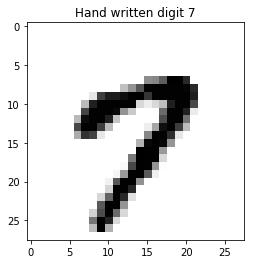

In [6]:
# Show image number 15, and write in the title what digit it should correspond to
N=15
imshow(x_train[N], cmap='gray_r')
_ = title('Hand written digit '+str(y_train[N]))

# Assignment 1

Implement the following distance functions

- d_infty $$ d_{\infty}(a,b) := \max_{i,j} |b_{ij}-a_{ij}|$$
- d_one $$ d_1(a,b) := \sum_{i,j} |b_{ij}-a_{ij}|$$
- d_two $$ d_2(a,b) := \sqrt{\sum_{i,j} |b_{ij}-a_{ij}|^2}$$

that take two `(28,28)` images in input, and return a non-negative number.

In [9]:
def dinfty( a, b ):
    return norm((a-b).ravel(), inf)

def d_one( a, b ):
    return norm((a-b).ravel(), 1)
    #return sum(abs(add(b, -a)))

def d_two( a, b ):
    return norm((a-b).ravel(), 2)
    #return math.sqrt( sum(abs(add(b, -a))**2) )

# Assignment 2

Write a function that, given a number `N`, and a distance function `dist`, computes the distance matrix D of shape `(N,N)` between the first `N` entries of `x_train`:

```
D[i,j] = dist(x_train[i], x_train[j])
```

performing the **minimum** number of operations (i.e., avoid computing a distance if it has already been computed before, i.e., keep in mind that dist(a,b) = dist(b,a)).

In [10]:
def distance_matrix(N, dist):
    D = array([dist(x_train[i], x_train[j]) if(j<=i) else 0 for i in range(0,N) for j in range(0,N) ]).reshape(N,N)
    D = D+D.transpose()
    return D

# Assignment 3

Compute and plot the three distance matrices

- Dinfty
- D1
- D2

for the first 100 images of the training set, using the function `imshow` applied to the three matrices

In [11]:
D_infty = distance_matrix(100, dinfty)
D_one = distance_matrix(100, d_one)
D_two = distance_matrix(100, d_two)

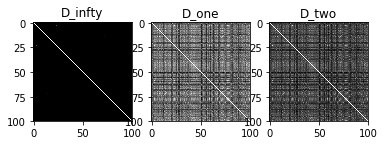

In [12]:
fig = figure()
img = D_infty
fig.add_subplot(131)
imshow(img, cmap='gray_r')
_ = title('D_infty')

img1 = D_one
fig.add_subplot(132)
imshow(img1, cmap='gray_r')
_ = title('D_one')

img2 = D_two
fig.add_subplot(133)
imshow(img2, cmap='gray_r')
_ = title('D_two')
show()

# Assignment 4

Using only a distance matrix, apply the algorithm described above and compute the efficency of the algorithm, i.e., write a function that:

Given a distance matrix with shape `(N,N)`, constructed on the first `N` samples of the `x_train` set, count the number of failures of the **leave one out** strategy, i.e., 

- set `error_counter` to zero

- for every line `i` of the matrix:

    - find the index `j` (different from `i`) for which `D[i,k] >= D[i,j]` for all `k` different from `i` and `j`.

    - if `y_train[j]` is different from `y_train[i]`, increment by one `error_counter`

- return the error: error_counter/N

- apply the function above to the 3 different distance matrices you computed before



In [13]:
def classify(z):
    all_distances = array([dist(x, z) for x in x_train])
    digit = y_train[argmin(all_distances)]
    return digit

In [14]:
def error_classification( D ):
    N=shape(D)[0]
    error_counter = 0
    for i in range(N):
        D[i,i] = 1000000000
        j = argmin(D[i])
        if (y_train[j] != y_train[i]): error_counter = error_counter+1
        D[i,i] = 0
    return error_counter/N

# Assignment 5

Run the algorithm implemented above for N=100,200,400,800,1600 on the three different distances, and plot the three error rate as a function of N (i.e., compute the distance matrix, and compute the efficiency associated to the distance matrix).

You should get an error like:
```
[[ 0.58      0.17      0.17    ]
 [ 0.52      0.145     0.135   ]
 [ 0.4425    0.15      0.135   ]
 [ 0.4       0.145     0.12875 ]
 [ 0.369375  0.1025    0.09375 ]]
```
where each column represents a different norm.

** In the next assignments, optional points are given if you manage to make the algorithm run faster, by pre-computing everything you can precompute in advance **

In [15]:
err_mtx=zeros((5, 3))
row_idx=0
list_dim = [100,200,400,800,1600]
for n in list_dim:
    D_infty = distance_matrix(n, dinfty)
    D_one = distance_matrix(n, d_one)
    D_two = distance_matrix(n, d_two)
    
    err_mtx[row_idx,0] = error_classification( D_infty )
    err_mtx[row_idx,1] = error_classification( D_one )
    err_mtx[row_idx,2] = error_classification( D_two )
   
    row_idx = row_idx+1
    
print(err_mtx)

[[0.58     0.17     0.17    ]
 [0.52     0.145    0.135   ]
 [0.4425   0.15     0.135   ]
 [0.4      0.145    0.12875 ]
 [0.369375 0.1025   0.09375 ]]


[ 100  200  400  800 1600]


Text(0,0.5,'Error rate')

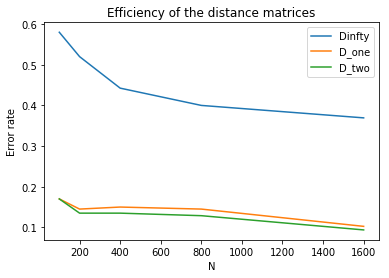

In [16]:
x = array(list_dim)
print(x)
plot(x, array(err_mtx[:,0]), label="Dinfty")
plot(x, array(err_mtx[:,1]), label="D_one")
plot(x, array(err_mtx[:,2]), label="D_two")
legend(loc='upper right')
title("Efficiency of the distance matrices")  
xlabel("N"); ylabel("Error rate")

# Assignment 6

In principle, it should be possible to decrease the error by using a better norm. From the table above, it is clear that the L2 distance works better than the L1 distance, which works better than the Linfty distance.

However, *none of these distances exploit the fact that the image is a two-dimensional object*, and that there is information also in the **neighboring** information of the pixels. 

One way to exploit this, is to interpret the image as a continuous function with values between zero and one, defined on a square domain `\Omega=[0,27]x[0,27]`.

$$ f: \Omega \to R $$

- Implement a function that computes an approximation of the $H^1$ norm distance on the renormalized images. Given two images $f_1$ and $f_2$
    - Compute $$a = \frac{f_1}{\int_\Omega f_1}$$, $$b=\frac{f_2}{\int_\Omega f_2}$$
    - Define the $H^1$ distance as
    $$
    d_{H^1}(f_1,f_2) := \sqrt{\int_\Omega |\nabla(a-b)|^2+ (a-b)^2}
    $$
    using the algorithm you prefer (or the library you prefer) to compute the gradients and the integrals. Notice that $\nabla f = (\partial f/\partial x, \partial f/\partial y)$ is a vector valued function, and $|\nabla g|^2 := (\partial g/\partial x)^2 + (\partial g/\partial y)^2$

- Compute the distance matrix and the efficiency for this distance for N=100,200,400,800,1600

In [17]:
def img_integral(img):
    return sum(img)

def gr_norm(img):
    return (gradient(img)[0])**2+(gradient(img)[1])**2

def H_1_norm( a,b ):
    a = a/img_integral(a)
    b = b/img_integral(b)
    
    return math.sqrt(img_integral(gr_norm(a-b)+(a-b)**2))

In [18]:
err_mtx=zeros((5, 1))
row_idx=0
list_dim = [100,200,400,800,1600]
for n in list_dim:
    D_H1 = distance_matrix(n, H_1_norm)
    err_mtx[row_idx] = error_classification( D_H1 )
    row_idx = row_idx+1
    
print(err_mtx)

[[0.23    ]
 [0.175   ]
 [0.145   ]
 [0.12125 ]
 [0.099375]]


Text(0,0.5,'Error rate')

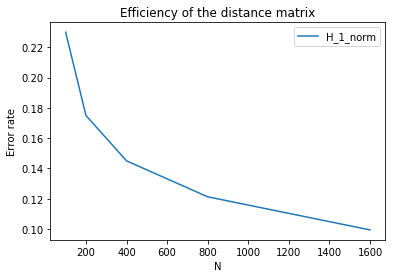

In [19]:
x = array(list_dim)

plot(x, array(err_mtx), label="H_1_norm")
#plot(x, array(err_mtx[:,0]), label="Dinfty")
#plot(x, array(err_mtx[:,1]), label="D_one")
#plot(x, array(err_mtx[:,2]), label="D_two")
legend(loc='upper right')
title("Efficiency of the distance matrix")  
xlabel("N"); ylabel("Error rate")

## Assignment 7

An even better improvement on the previous distance function is given by the following algorithm

- Given two images $f1$ and $f2$:
    - Compute $$a = \frac{f_1}{\int_\Omega f_1}$$, $$b=\frac{f_2}{\int_\Omega f_2}$$
    - Solve 
    $$
    -\Delta \phi = a - b \qquad \text{ in } \Omega
    $$
    $$
    \phi = 0 \text{ on } \partial\Omega
    $$
    - Define the *Monge Ampere* distance
    $$
    d_{MA}(f_1,f_2) = \int_\Omega (a+b)|\nabla \phi|^2
    $$

- Compute the distance matrix and the efficiency for this distance for N=100,200,400,800,1600

In [38]:
from scipy.sparse import diags
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import splu

N = len(x_train[0])-2
lap = -(1)*diags([1,1,-4,1,1], [-N,-1, 0, 1, N], shape=(N*N, N*N)).toarray()
for i in range(1,N):
        lap[i*N,(i*N)-1] = 0
        lap[(i*N)-1,i*N] = 0
        
lap_csc = csc_matrix(lap)
L = splu(lap_csc)


def solve_equation(image):
    u = image[1:-1,1:-1].ravel()
    v = L.solve(u)
    
    v = reshape(v,(N,N))
    result = zeros((N+2,N+2))
    result[1:-1,1:-1]=v
    
    return result

def d_MA(f1,f2):
    a = f1/sum(f1)
    b = f2/sum(f2)
    diff = a-b
    
    phi = solve_equation(diff)
    return sum((a+b)*squared_gradient(phi))

To apply the efficiency_evaluator algorithm, I calculate the distance_matrix function with the distance d_MA defined.

In [40]:
D_MA =distance_matrix(1600,d_MA)

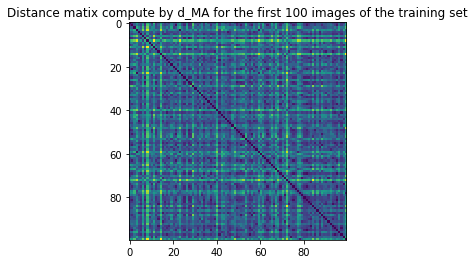

In [41]:
imshow(D_MA[0:100,0:100],cmap = 'viridis')
_ = title('Distance matix compute by d_MA for the first 100 images of the training set')

Error rate for this distance for N=100,200,400,800,1600.

In [42]:
%time efficiency =[[efficiency_evaluator(n,D_MA)] for n in sizes]
print(efficiency)

CPU times: user 342 ms, sys: 3.56 ms, total: 346 ms
Wall time: 359 ms
[[0.24], [0.2], [0.145], [0.12875], [0.12125]]


Finally I plot the 5 error rate of the distance denined as a function of N.

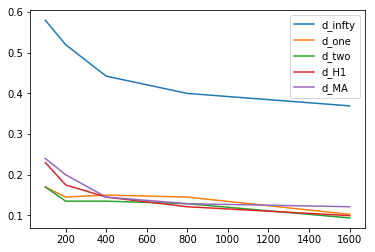

In [44]:
efficiency = [[efficiency_evaluator(n,d) for d in [D_infty,D_one,D_two,D_H1,D_MA]] for n in sizes]
efficiency =array(efficiency)
for i in range(len(efficiency.T)):
    plot(sizes, efficiency.T[i])
    
_ = legend(['d_infty','d_one','d_two','d_H1','d_MA'])